In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
from sklearn import feature_selection
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import PolynomialFeatures
import warnings; warnings.simplefilter('ignore')

In [2]:
sns.set()

In [3]:
train_df = pd.read_csv("train.csv")

In [4]:
train_df.head()

id  target      0      1      2      3      4      5      6      7  ...    \
0   0     1.0 -0.098  2.165  0.681 -0.614  1.309 -0.455 -0.236  0.276  ...     
1   1     0.0  1.081 -0.973 -0.383  0.326 -0.428  0.317  1.172  0.352  ...     
2   2     1.0 -0.523 -0.089 -0.348  0.148 -0.022  0.404 -0.023 -0.172  ...     
3   3     1.0  0.067 -0.021  0.392 -1.637 -0.446 -0.725 -1.035  0.834  ...     
4   4     1.0  2.347 -0.831  0.511 -0.021  1.225  1.594  0.585  1.509  ...     

     290    291    292    293    294    295    296    297    298    299  
0  0.867  1.347  0.504 -0.649  0.672 -2.097  1.051 -0.414  1.038 -1.065  
1 -0.165 -1.695 -1.257  1.359 -0.808 -1.624 -0.458 -1.099 -0.936  0.973  
2  0.013  0.263 -1.222  0.726  1.444 -1.165 -1.544  0.004  0.800 -1.211  
3 -0.404  0.640 -0.595 -0.966  0.900  0.467 -0.562 -0.254 -0.533  0.238  
4  0.898  0.134  2.415 -0.996 -1.006  1.378  1.246  1.478  0.428  0.253  

[5 rows x 302 columns]

In [5]:
# check for missing values
#train_df.isnull().sum()/len(train_df)*100
#train_df.isnull().any().any()
train_df.isna().any().any()

False

In [6]:
std = train_df[train_df.columns[2:]].std()
var = train_df[train_df.columns[2:]].var()
mean = train_df[train_df.columns[2:]].mean()
median = train_df[train_df.columns[2:]].median()
max = train_df[train_df.columns[2:]].max()
min = train_df[train_df.columns[2:]].min()

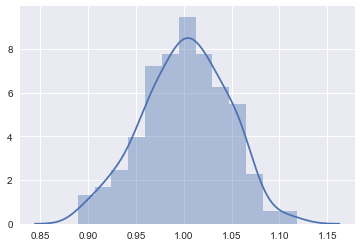

In [7]:
sns.distplot(std, norm_hist=True)

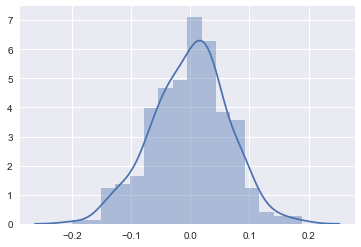

In [8]:
sns.distplot(mean, norm_hist=True)

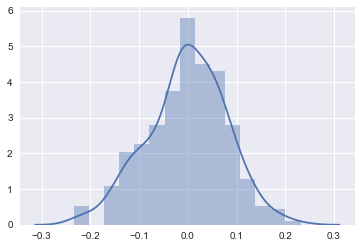

In [9]:
sns.distplot(median, norm_hist=True)

### Low Variance Filtering

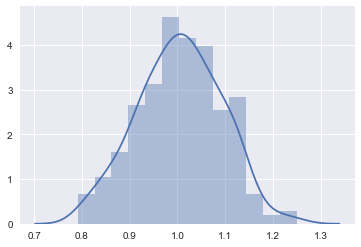

In [10]:
sns.distplot(var, norm_hist=True)

In [11]:
temp_df = train_df.copy()
X = temp_df[temp_df.columns[2:]]
selector = VarianceThreshold(threshold=0.2)

In [12]:
temp = selector.fit_transform(X)
len(temp[0])

300

### Correlation as for feature selection

In [13]:
correlation_matrix = temp_df[temp_df.columns[1:]].corr(method='pearson')

In [14]:
correlation_matrix['target'][0]

1.0

In [15]:
print(len(temp_df.loc[temp_df['target']==0]))
print(len(temp_df.loc[temp_df['target']==1]))

90
160


In [16]:
mean_0 = temp_df.loc[temp_df['target']==0].mean()
mean_1 = temp_df.loc[temp_df['target']==1].mean()

In [17]:
median_0 = temp_df.loc[temp_df['target']==0].median()
median_1 = temp_df.loc[temp_df['target']==1].median()

In [18]:
std_0 = temp_df.loc[temp_df['target']==0].std()
std_1 = temp_df.loc[temp_df['target']==1].std()

In [19]:
corrs = train_df.corr().abs().unstack().sort_values(kind="quicksort").reset_index()
corrs[corrs['level_0'] != corrs['level_1']].head()

level_0 level_1             0
0     129     238  2.701642e-07
1     238     129  2.701642e-07
2     184     158  1.113105e-06
3     158     184  1.113105e-06
4     295     190  2.245656e-06

In [20]:
filter_cols = list(corrs[(corrs['level_0'] == 'target') & (abs(corrs[0]) > 0.1) & (corrs['level_1'] != 'target') & (corrs['level_1'] != 'id')]['level_1'].sort_values().reset_index(drop=True))

In [21]:
filter_cols

['0',
 '101',
 '105',
 '108',
 '114',
 '117',
 '127',
 '129',
 '13',
 '133',
 '134',
 '150',
 '16',
 '164',
 '165',
 '17',
 '183',
 '189',
 '194',
 '199',
 '201',
 '209',
 '217',
 '220',
 '226',
 '230',
 '237',
 '239',
 '24',
 '244',
 '252',
 '258',
 '272',
 '276',
 '289',
 '295',
 '298',
 '30',
 '33',
 '39',
 '4',
 '43',
 '63',
 '65',
 '73',
 '80',
 '82',
 '90',
 '91',
 '98']

In [22]:
from sklearn.naive_bayes import GaussianNB

In [23]:
model = GaussianNB()

In [24]:
model.fit(train_df[filter_cols], train_df['target'])

GaussianNB(priors=None, var_smoothing=1e-09)

In [25]:
test_df = pd.read_csv("test.csv")

In [26]:
y_pred = model.predict(test_df[filter_cols])

In [27]:
y_pred

array([1., 1., 1., ..., 1., 1., 0.])

In [28]:
y_pred_train = model.predict(train_df[filter_cols])

In [29]:
count = 0
for pred in y_pred_train:
    if(pred > 0):
        count += 1
print(count)

161


In [30]:
len(y_pred)

19750

In [31]:
test_df['id'].head()

0    250
1    251
2    252
3    253
4    254
Name: id, dtype: int64

In [32]:
d = {'id': test_df['id'], 'target': y_pred}

In [33]:
submit_df = pd.DataFrame(data=d)

In [34]:
submit_df.to_csv('gaus_nb_pred.csv', index=False)

In [35]:
type(y_pred)

numpy.ndarray

In [36]:
np.count_nonzero(y_pred == 0)

5230

# Checking Data Distributions

In [37]:
cols = train_df.columns[2:]

In [38]:
from scipy.stats import shapiro

In [39]:
cols

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       '290', '291', '292', '293', '294', '295', '296', '297', '298', '299'],
      dtype='object', length=300)

In [40]:
new_filter_cols = []
for col in cols:
    stat, p = shapiro(train_df[col])
    if p <= 0.05:
        print(col + " is not normal")
    else:
        new_filter_cols.append(col)

77 is not normal
79 is not normal
94 is not normal
95 is not normal
126 is not normal
144 is not normal
158 is not normal
164 is not normal
186 is not normal
220 is not normal
221 is not normal
226 is not normal
241 is not normal
270 is not normal


In [41]:
model2 = GaussianNB()

In [42]:
model2.fit(train_df[new_filter_cols], train_df['target'])

GaussianNB(priors=None, var_smoothing=1e-09)

In [43]:
y_pred2 = model2.predict(test_df[new_filter_cols])

In [44]:
np.count_nonzero(y_pred2 == 0)

4442

In [45]:
len(y_pred2)

19750

In [46]:
d = {'id': test_df['id'], 'target': y_pred2}
submit_df = pd.DataFrame(data=d)
submit_df.to_csv('gaus_nb_pred2.csv', index=False)

# Feature Selection Part 2

In [ ]:
#from sklearn.ensemble import RandomForestClassifier

In [ ]:
#clf = RandomForestClassifier(n_estimators=100, max_depth=)

In [47]:
correlated_features = set()
correlation_matrix = train_df[train_df.columns[2:]].corr()

In [48]:
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i,j]) > 0.8:
            colname = correlation_matrix[i]
            correlated_features.add(colname)

In [49]:
len(correlated_features)

0

In [ ]:
# Drop correlated features
#train_df.drop(labels=correlated_features, axis=1, inplace=True) 

In [50]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [51]:
X = train_df[train_df.columns[2:]]
y = train_df[train_df.columns[1]]

In [52]:
len(y)

250

In [53]:
f_classif(X, y)

(array([2.98004117e+00, 1.34038318e+00, 5.68665851e-02, 3.30825692e-02,
        3.30772399e+00, 6.29777256e-01, 8.10166819e-01, 4.45669089e-03,
        5.83344759e-01, 1.84559134e+00, 4.59595858e-02, 2.45747767e-01,
        2.05518904e-02, 2.91737155e+00, 1.00800003e+00, 2.21743121e+00,
        5.27131239e+00, 3.09362169e+00, 6.30686077e-01, 5.89406548e-01,
        1.46381072e-03, 5.14776237e-01, 8.19336505e-02, 6.57366606e-01,
        7.66017693e+00, 1.31468097e+00, 2.37713433e+00, 7.90696228e-01,
        4.24492007e-01, 7.62312393e-01, 4.44572255e+00, 8.28173621e-02,
        2.39915816e-01, 4.02324151e+01, 2.61774421e-01, 6.06230997e-02,
        9.21166320e-01, 1.31777949e-02, 4.08361689e-01, 5.17096845e+00,
        3.40424229e-03, 1.40090017e-02, 3.53966747e-01, 3.71047674e+00,
        1.76695650e-02, 2.03791541e+00, 1.38781487e+00, 4.44879872e-01,
        5.33151972e-01, 5.11124448e-02, 6.48121568e-01, 4.08840727e-02,
        1.17867342e+00, 5.83141886e-01, 3.19117766e-01, 6.824575

In [54]:
X.head()

0      1      2      3      4      5      6      7      8      9  \
0 -0.098  2.165  0.681 -0.614  1.309 -0.455 -0.236  0.276 -2.246  1.825   
1  1.081 -0.973 -0.383  0.326 -0.428  0.317  1.172  0.352  0.004 -0.291   
2 -0.523 -0.089 -0.348  0.148 -0.022  0.404 -0.023 -0.172  0.137  0.183   
3  0.067 -0.021  0.392 -1.637 -0.446 -0.725 -1.035  0.834  0.503  0.274   
4  2.347 -0.831  0.511 -0.021  1.225  1.594  0.585  1.509 -0.012  2.198   

   ...      290    291    292    293    294    295    296    297    298    299  
0  ...    0.867  1.347  0.504 -0.649  0.672 -2.097  1.051 -0.414  1.038 -1.065  
1  ...   -0.165 -1.695 -1.257  1.359 -0.808 -1.624 -0.458 -1.099 -0.936  0.973  
2  ...    0.013  0.263 -1.222  0.726  1.444 -1.165 -1.544  0.004  0.800 -1.211  
3  ...   -0.404  0.640 -0.595 -0.966  0.900  0.467 -0.562 -0.254 -0.533  0.238  
4  ...    0.898  0.134  2.415 -0.996 -1.006  1.378  1.246  1.478  0.428  0.253  

[5 rows x 300 columns]

In [59]:
from sklearn.feature_selection import RFECV
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [56]:
svc = SVC(kernel="linear")

In [57]:
rfc = RandomForestClassifier(class_weight='balanced', n_estimators=100)

In [60]:
lrc = LogisticRegression(class_weight='balanced', penalty='l1', C=0.1, solver='liblinear')

In [61]:
selector = RFECV(estimator=svc, cv=StratifiedKFold(2), scoring='accuracy')

In [62]:
selector.fit(X, y)

RFECV(cv=StratifiedKFold(n_splits=2, random_state=None, shuffle=False),
   estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
   min_features_to_select=1, n_jobs=None, scoring='accuracy', step=1,
   verbose=0)

In [63]:
print("Optimal number of features : %d" % selector.n_features_)

Optimal number of features : 107


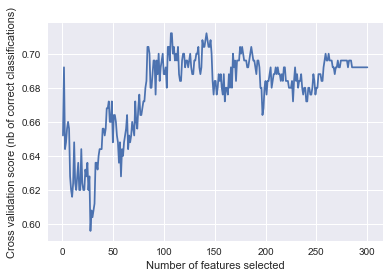

In [64]:
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(selector.grid_scores_) + 1), selector.grid_scores_)
plt.show()

In [65]:
len(selector.support_)

300

In [66]:
col_filt = X.columns[selector.support_]

In [67]:
len(col_filt)

107

In [68]:
from sklearn.naive_bayes import GaussianNB

In [69]:
model = GaussianNB()
model.fit(train_df[col_filt], train_df['target'])

GaussianNB(priors=None, var_smoothing=1e-09)

In [70]:
test_df = pd.read_csv("test.csv")

In [71]:
y_pred = model.predict(test_df[col_filt])

In [72]:
count = 0
for pred in y_pred:
    if(pred > 0):
        count += 1
print(count)

15041


In [73]:
d = {'id': test_df['id'], 'target': y_pred}
submit_df = pd.DataFrame(data=d)
submit_df.to_csv('gaus_nb_pred3.csv', index=False)

In [74]:
from sklearn.linear_model import LogisticRegression

In [75]:
model = LogisticRegression(class_weight='balanced', penalty='l1', C=0.1, solver='liblinear')

In [76]:
model.fit(train_df[col_filt], train_df['target'])

LogisticRegression(C=0.1, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l1', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [77]:
y_pred = model.predict(test_df[col_filt])

In [78]:
count = 0
for pred in y_pred:
    if(pred > 0):
        count += 1
print(count)

10669


In [79]:
d = {'id': test_df['id'], 'target': y_pred}
submit_df = pd.DataFrame(data=d)
submit_df.to_csv('log_class_pred2.csv', index=False)

# Feature Selection with ANOVA

In [80]:
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import f_regression

In [81]:
Selector_f = SelectPercentile(f_regression, percentile=25)

In [82]:
Selector_f.fit(X, y)

SelectPercentile(percentile=25,
         score_func=<function f_regression at 0x000002678E511158>)

In [83]:
len(Selector_f.scores_)

300

In [84]:
for n,s in zip(X.columns,Selector_f.scores_):
 print("F-score: %3.2f for feature %s" % (s,n))

F-score: 2.98 for feature 0
F-score: 1.34 for feature 1
F-score: 0.06 for feature 2
F-score: 0.03 for feature 3
F-score: 3.31 for feature 4
F-score: 0.63 for feature 5
F-score: 0.81 for feature 6
F-score: 0.00 for feature 7
F-score: 0.58 for feature 8
F-score: 1.85 for feature 9
F-score: 0.05 for feature 10
F-score: 0.25 for feature 11
F-score: 0.02 for feature 12
F-score: 2.92 for feature 13
F-score: 1.01 for feature 14
F-score: 2.22 for feature 15
F-score: 5.27 for feature 16
F-score: 3.09 for feature 17
F-score: 0.63 for feature 18
F-score: 0.59 for feature 19
F-score: 0.00 for feature 20
F-score: 0.51 for feature 21
F-score: 0.08 for feature 22
F-score: 0.66 for feature 23
F-score: 7.66 for feature 24
F-score: 1.31 for feature 25
F-score: 2.38 for feature 26
F-score: 0.79 for feature 27
F-score: 0.42 for feature 28
F-score: 0.76 for feature 29
F-score: 4.45 for feature 30
F-score: 0.08 for feature 31
F-score: 0.24 for feature 32
F-score: 40.23 for feature 33
F-score: 0.26 for featu

# Experiment

# Experiment with XGBoost

In [85]:
from sklearn.ensemble import GradientBoostingClassifier

In [86]:
model = GradientBoostingClassifier(verbose=1, loss='deviance', n_iter_no_change=100)

In [87]:
model.fit(X, y)

      Iter       Train Loss   Remaining Time 
         1           1.2120            0.60s
         2           1.1326            0.54s
         3           1.0745            0.52s
         4           1.0182            0.50s
         5           0.9630            0.47s
         6           0.9146            0.47s
         7           0.8704            0.48s
         8           0.8209            0.49s
         9           0.7847            0.48s
        10           0.7417            0.47s
        20           0.4810            0.38s
        30           0.3220            0.31s
        40           0.2175            0.26s
        50           0.1531            0.22s
        60           0.1123            0.17s
        70           0.0822            0.13s
        80           0.0595            0.09s
        90           0.0432            0.04s
       100           0.0312            0.00s


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=100, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=1, warm_start=False)

In [88]:
len(model.feature_importances_)

300

In [89]:
model.feature_importances_.max()

0.14237164337351113

In [90]:
model.estimators_

array([[DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
           max_features=None, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort='auto',
           random_state=<mtrand.RandomState object at 0x0000026789693EA0>,
           splitter='best')],
       [DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
           max_features=None, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort='auto',
           random_state=<mtrand.RandomState object at 0x0000026789693EA0>,
           splitter='best')],
       [DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
           max_features=None, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_

# Data Visualization Exploring

In [91]:
sns.set(style="ticks")

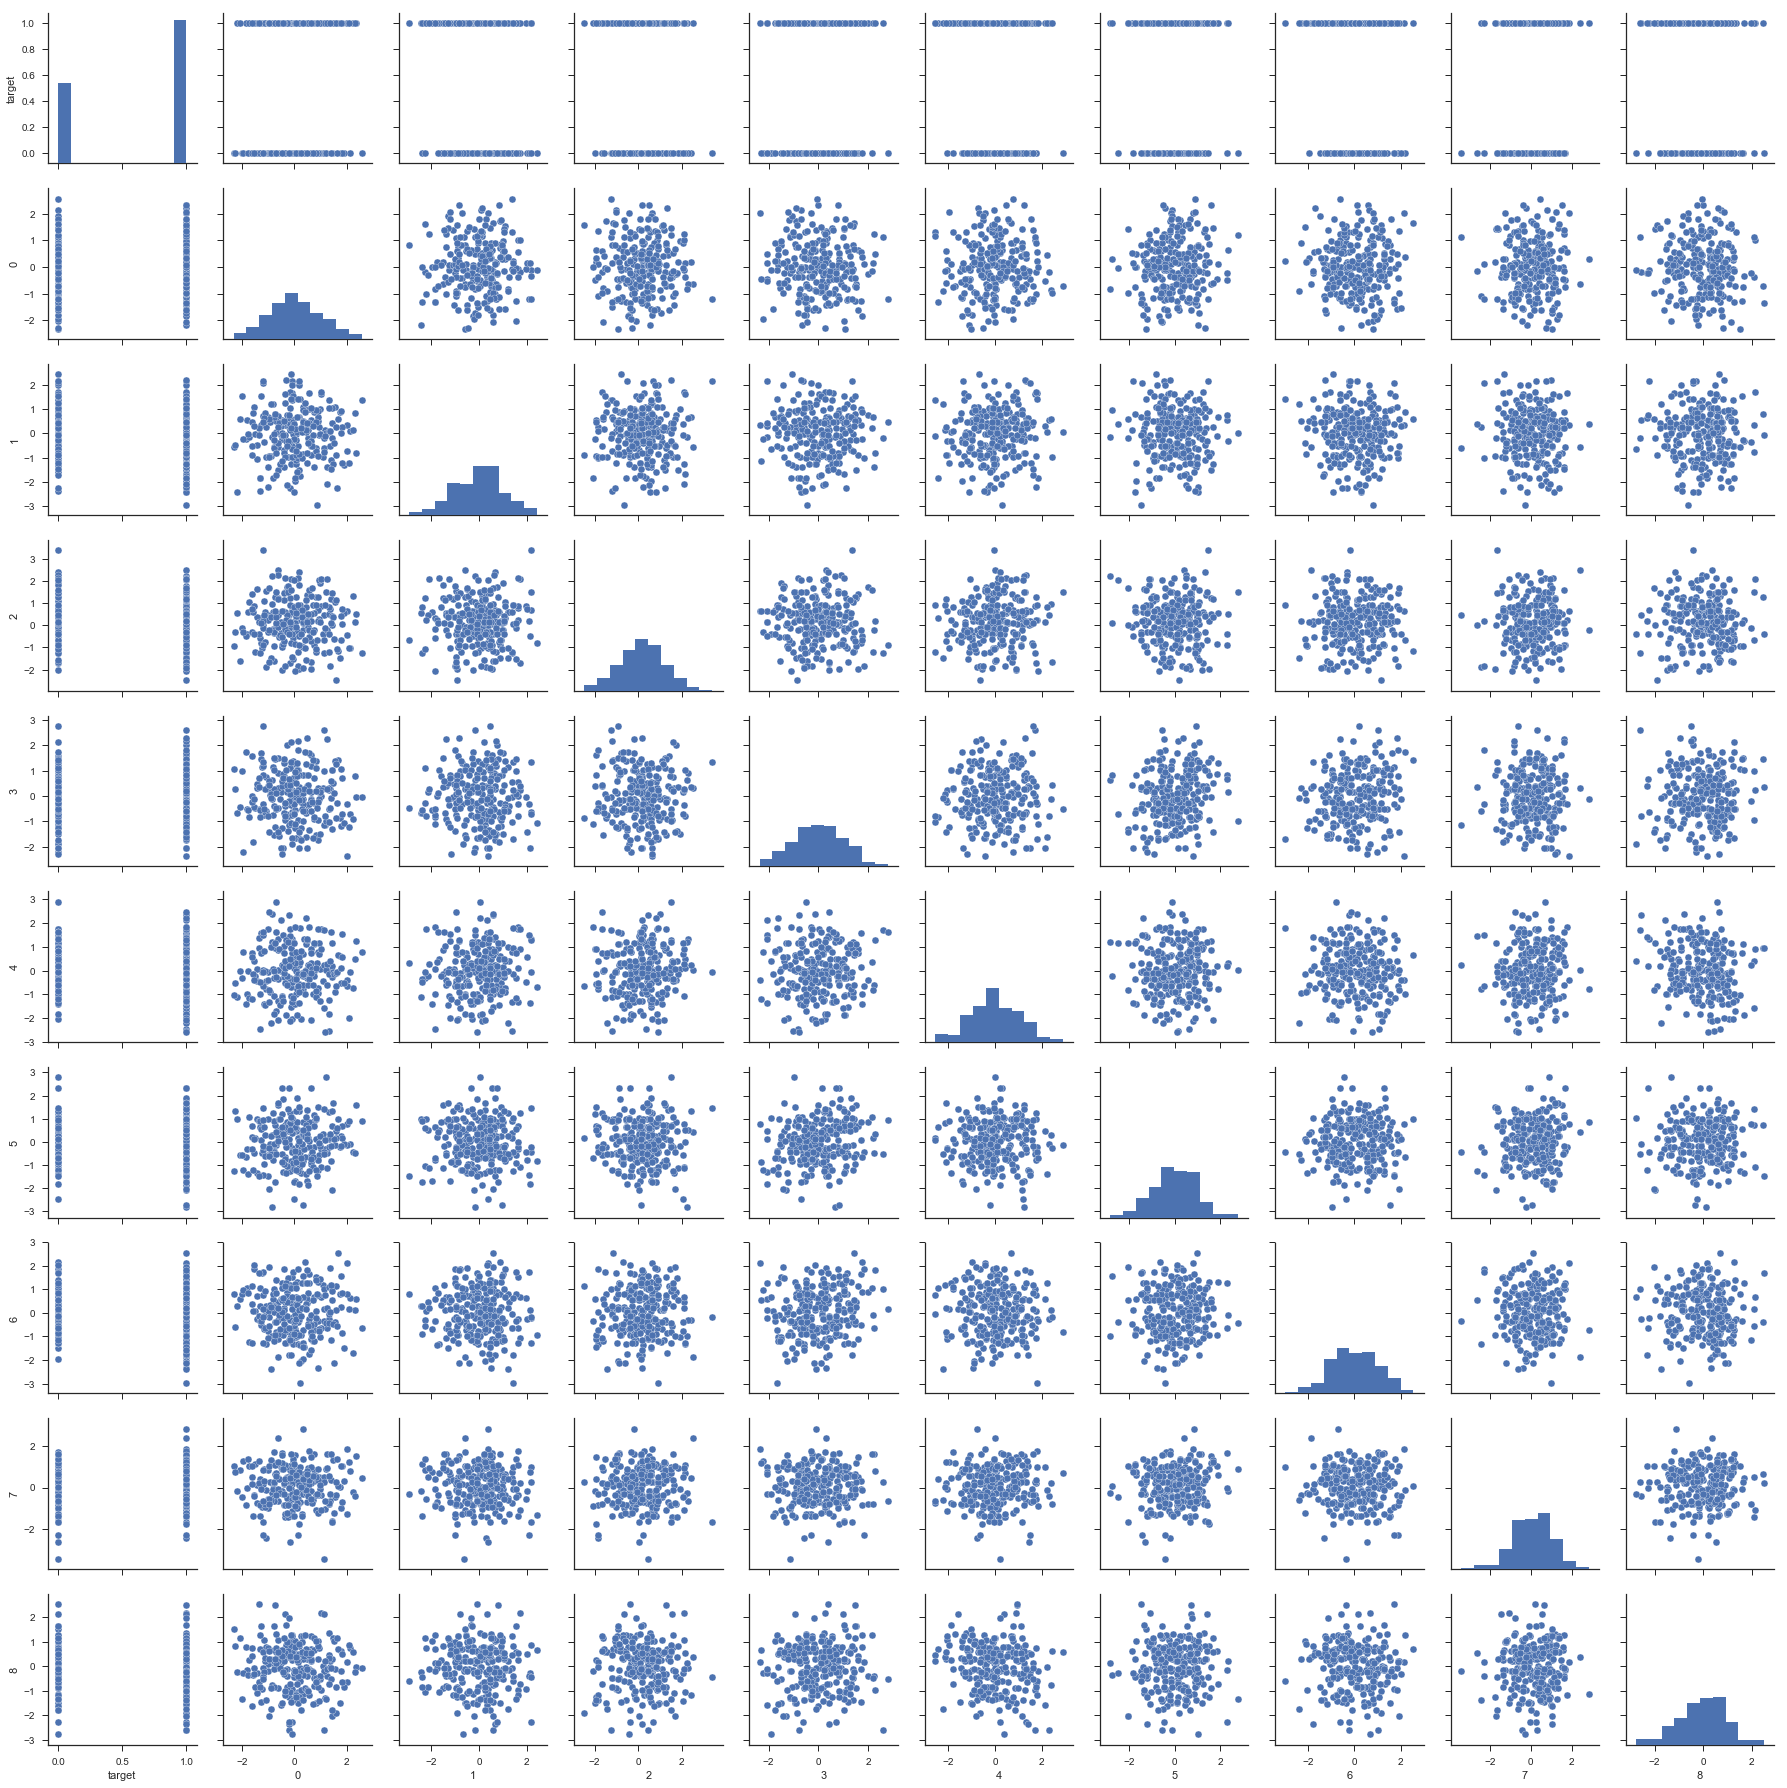

In [92]:
sns.pairplot(train_df[train_df.columns[1:11]])

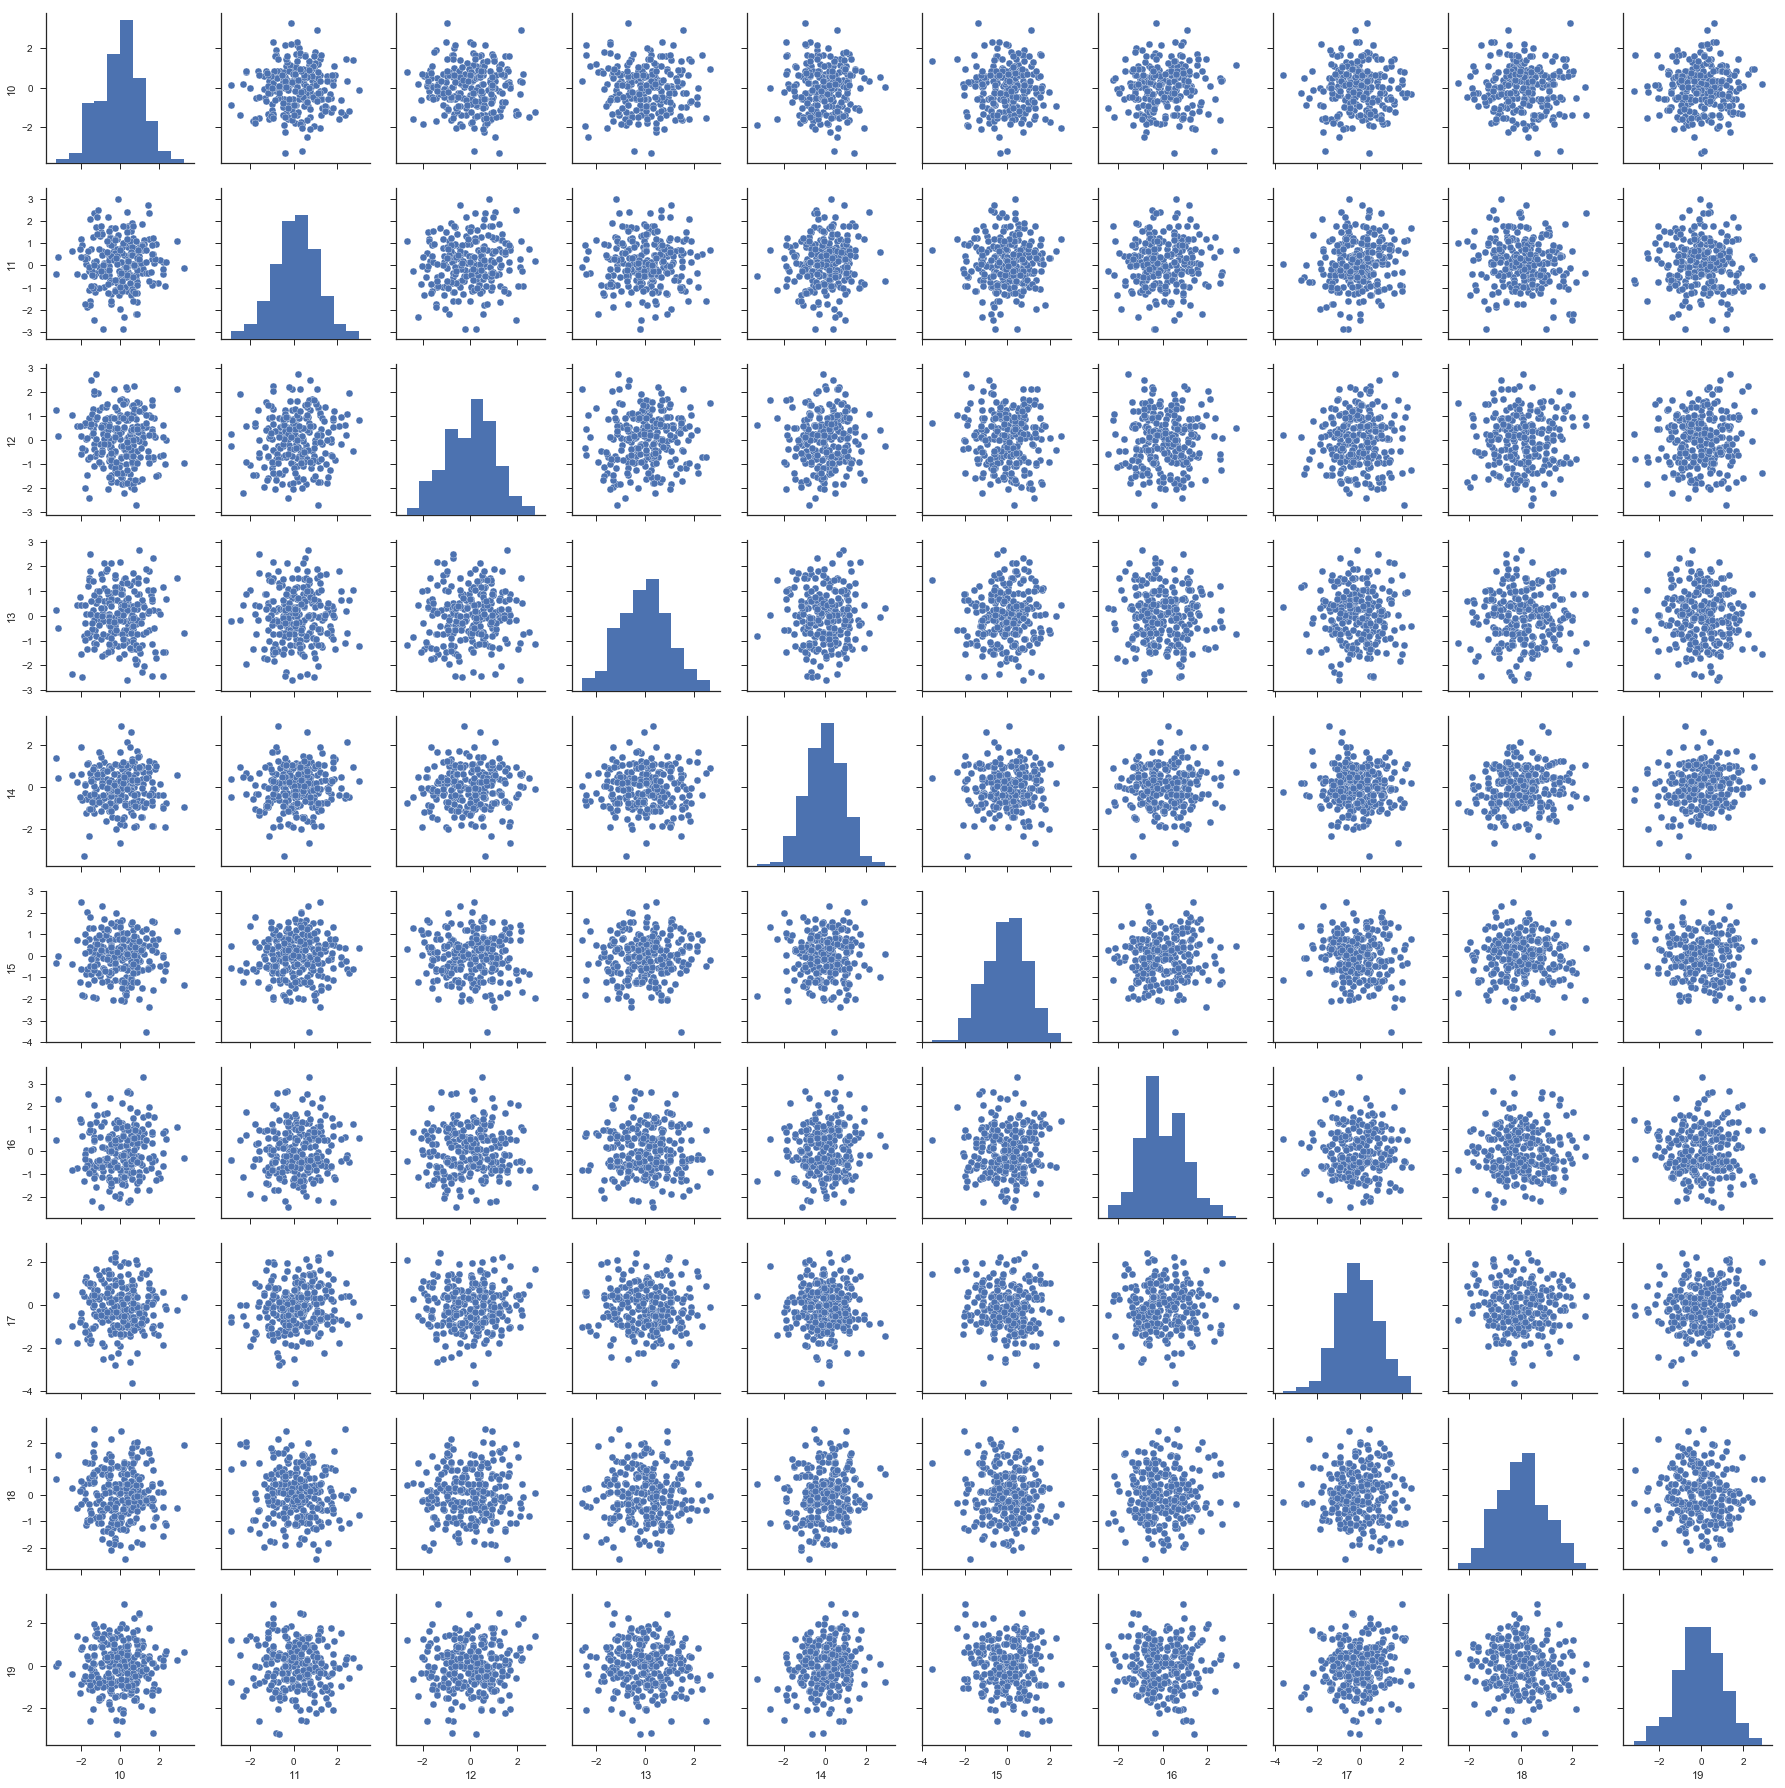

In [94]:
sns.pairplot(train_df[train_df.columns[12:22]])

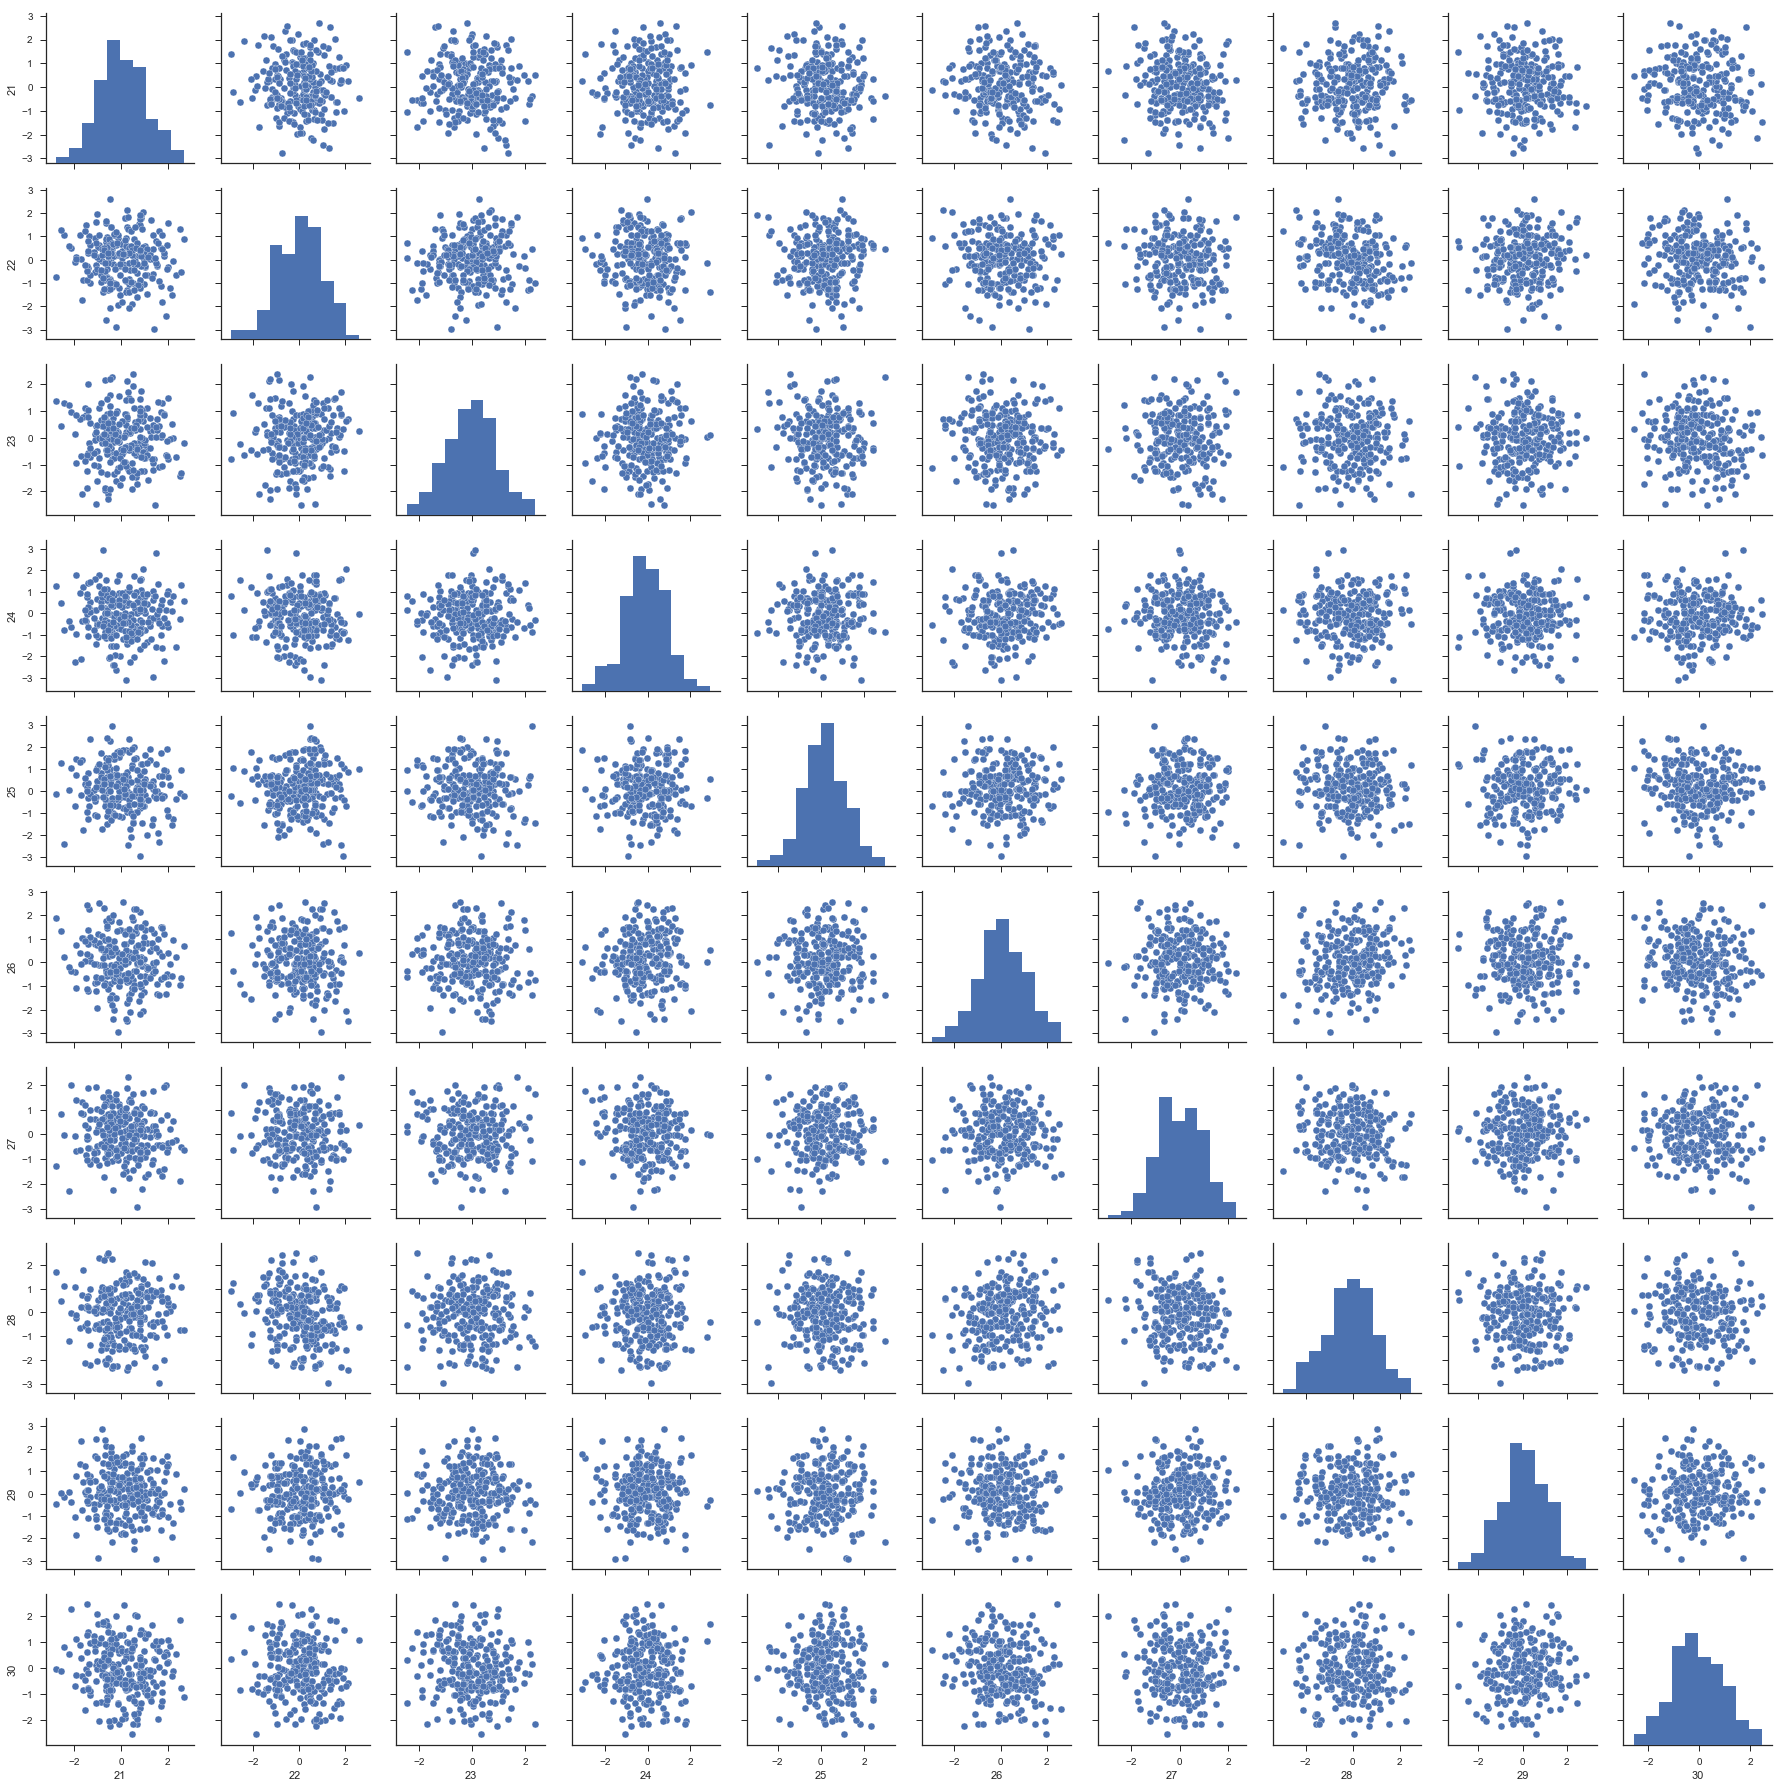

In [95]:
sns.pairplot(train_df[train_df.columns[23:33]])

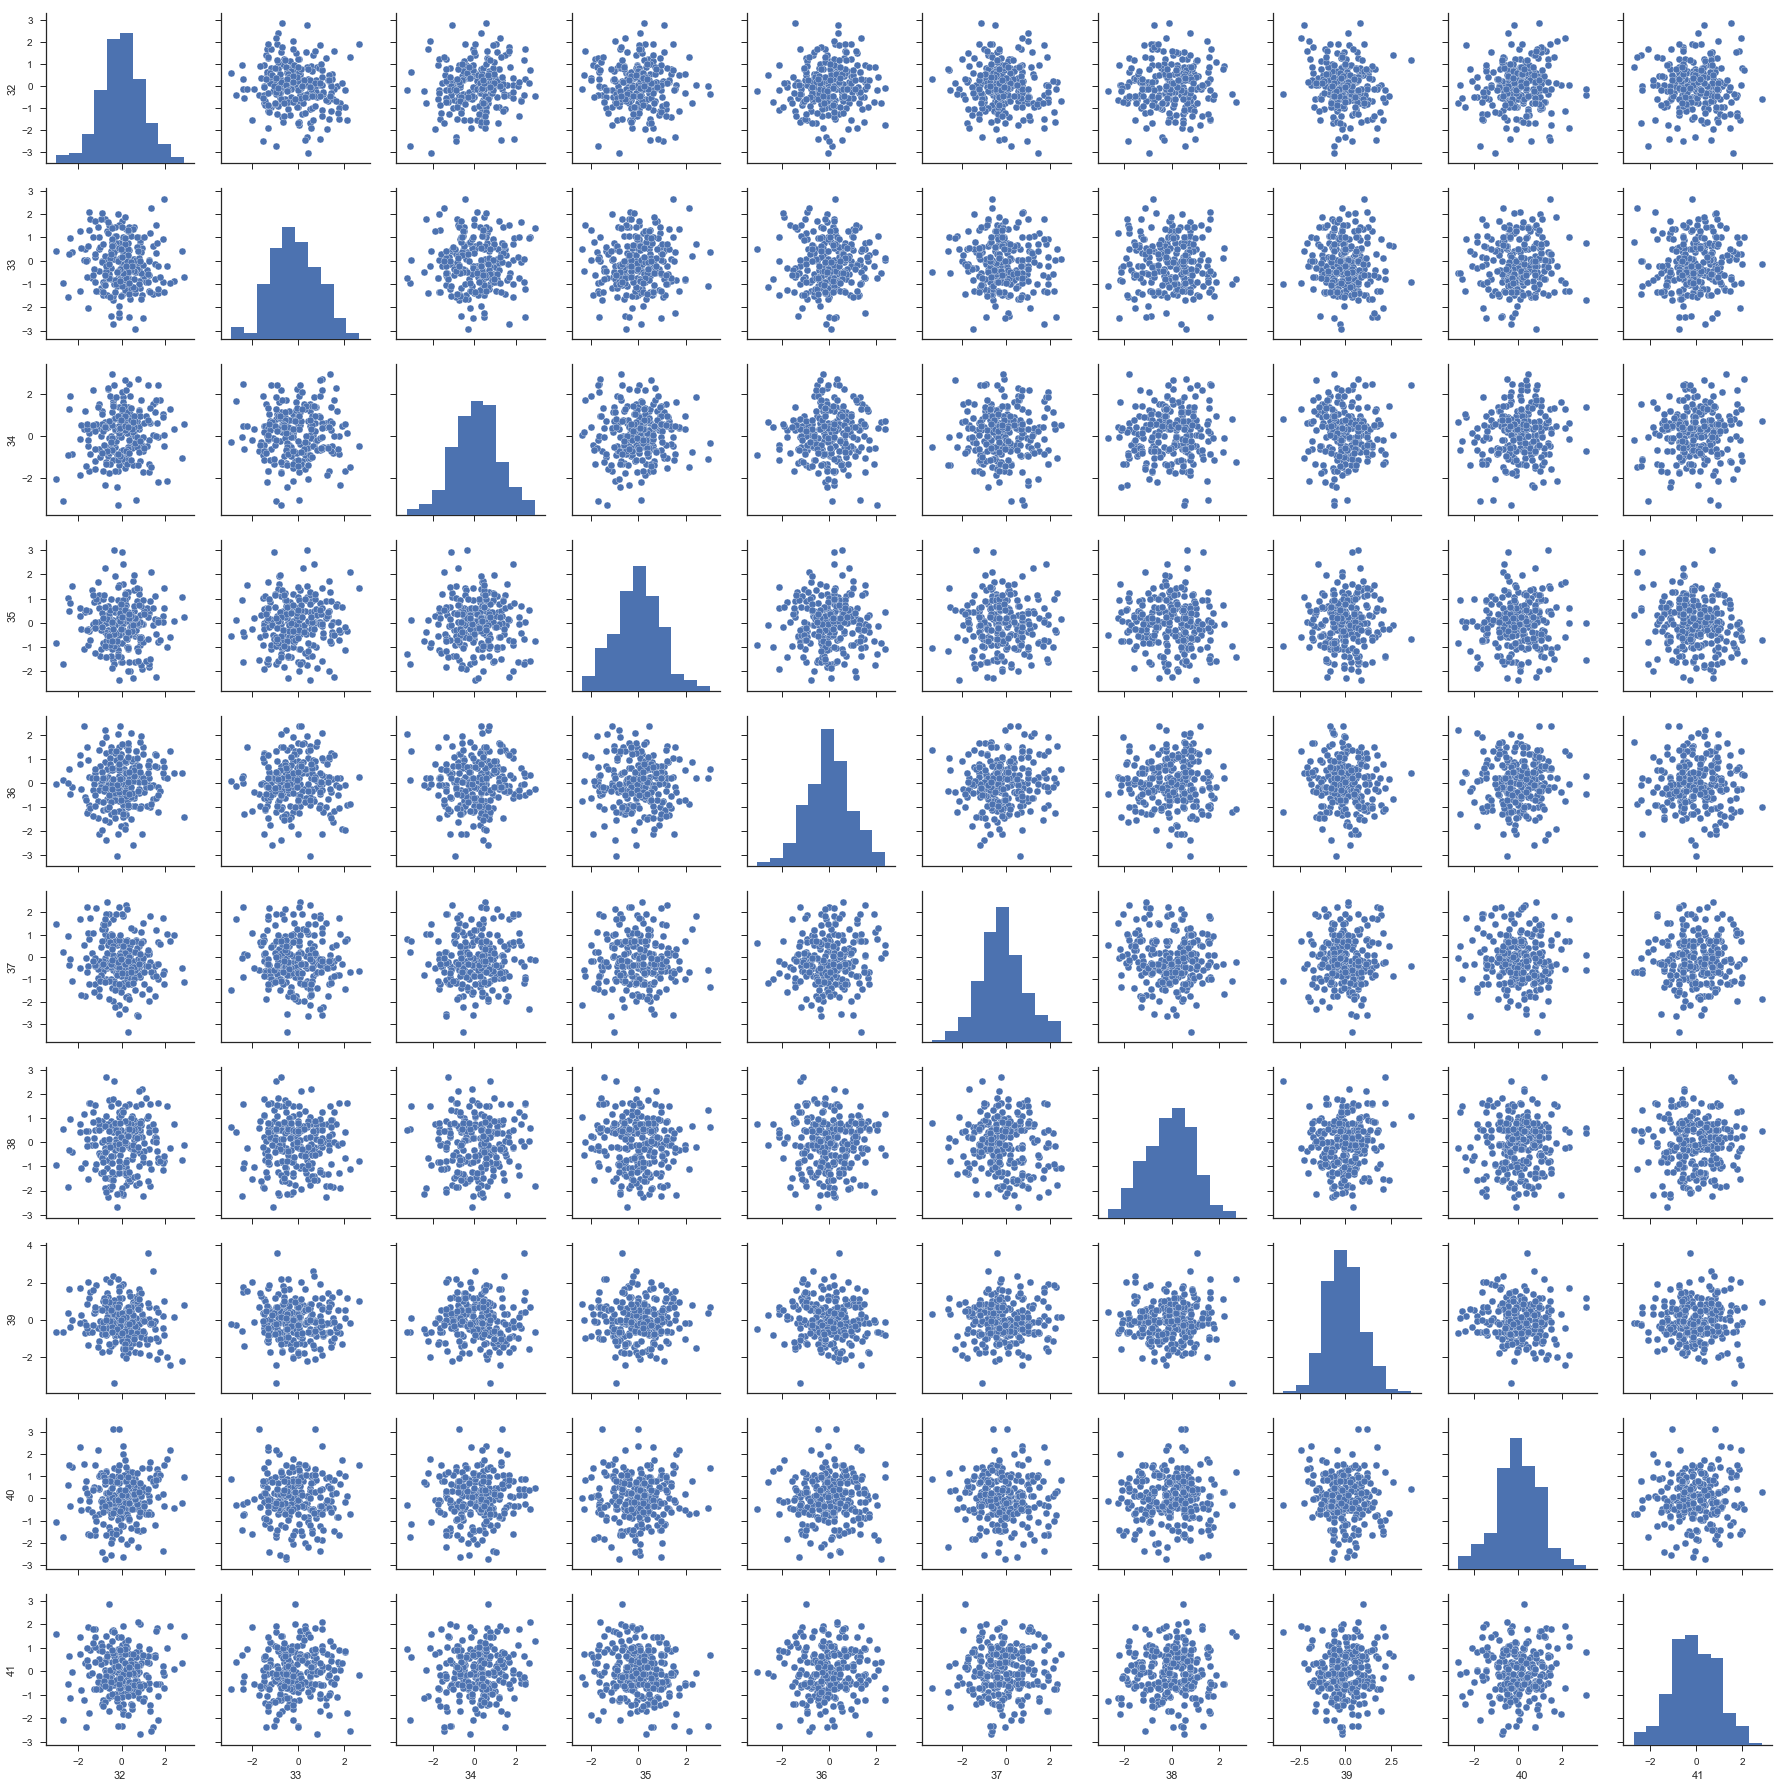

In [96]:
sns.pairplot(train_df[train_df.columns[34:44]])